In [ ]:
%autosave 30
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

Autosaving every 30 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset.csv')
Classes = pd.read_csv('/content/drive/My Drive/Classes.csv')

dataset['classes'] = Classes
dataset

,Priority,Unix TimeStamp,Source port,Destination port,Protocol,TTL,TOS,Datagram Length,A,P,R,S,F,TCP length,TCP options,classes
0,3,-1.000000,0.763490,-0.999237,3,-0.505976,1,-1.000000,0,0,1,0,0,1,0,0
1,3,-0.999000,-0.999237,0.531834,3,-0.498008,1,-1.000000,0,0,1,0,0,1,0,0
2,3,-0.999000,-0.999237,0.531834,3,-0.498008,1,-1.000000,0,0,1,0,0,1,0,0
3,3,-0.998589,-0.997558,0.853368,3,-0.505976,1,-0.993103,1,0,0,0,0,4,3,0
4,3,-0.998589,-0.997558,0.853368,3,-0.505976,1,-0.761494,1,1,0,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25736,3,0.999651,-0.755339,-0.905359,3,0.003984,1,-0.160920,1,0,0,0,0,1,0,0
25737,3,0.999654,-0.755339,-0.905329,3,0.003984,1,-0.901149,1,1,0,0,0,1,0,0
25738,3,0.999655,-0.755339,-0.905298,3,0.003984,1,-0.901149,1,1,0,0,0,1,0,0
25739,2,0.999823,-1.000000,-1.000000,2,-1.000000,3,-0.989655,0,0,0,0,0,0,0,1


In [ ]:
print(dataset.columns[:])
corr = dataset[dataset.columns[:]].corr()['classes'][:].abs()
corr.sort_values(ascending = False)

Index(['Priority', 'Unix TimeStamp', 'Source port', 'Destination port',
       'Protocol', 'TTL', 'TOS', 'Datagram Length', 'A', 'P', 'R', 'S', 'F',
       'TCP length', 'TCP options', 'classes'],
      dtype='object')


classes             1.000000
Priority            0.862247
R                   0.371830
Protocol            0.291782
Destination port    0.288368
A                   0.264573
F                   0.215099
TOS                 0.212674
P                   0.165469
Source port         0.159474
Unix TimeStamp      0.135101
TCP options         0.129982
TCP length          0.123938
S                   0.031568
Datagram Length     0.024056
TTL                 0.012675
Name: classes, dtype: float64

In [ ]:
X = dataset[['Priority','Protocol','Destination port']]
y = Classes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Text(0.5, 1.0, 'Confusion Matrix')

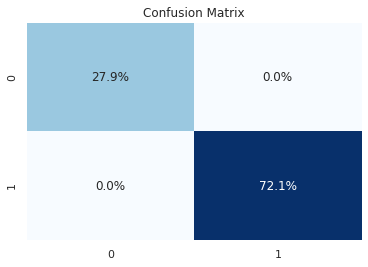

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.1%', cmap='Blues',cbar=False, ax = ax)
ax.set_title('Confusion Matrix')

In [ ]:
cf_matrix

array([[1793,    0],
       [   0, 4643]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1793    0]
 [   0 4643]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1793
           1       1.00      1.00      1.00      4643

    accuracy                           1.00      6436
   macro avg       1.00      1.00      1.00      6436
weighted avg       1.00      1.00      1.00      6436



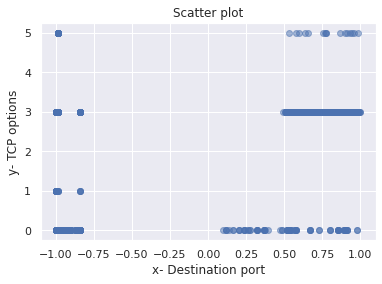

In [ ]:
#data
x = dataset['Destination port']
y = dataset['TCP options']

# Plot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x- Destination port')
plt.ylabel('y- TCP options')
plt.show()


Text(0, 0.5, 'Priority')

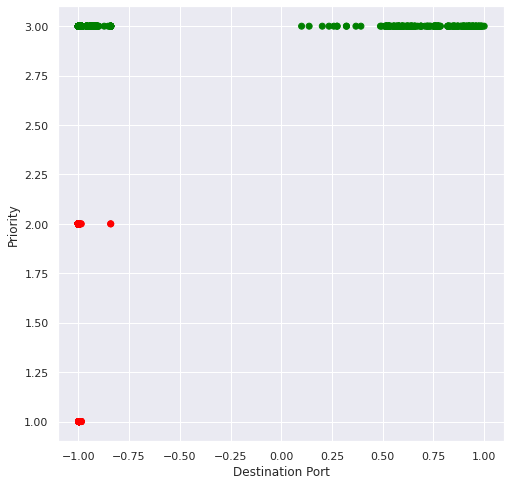

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = X_test['Destination port']
y = X_test['Priority']
label = y_pred
colors = ['green','red']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Destination Port')
plt.ylabel('Priority')
